# ENG 10: HW 4 (Linear Systems)
This is a short homework that touches on representing (and solving) problems as systems of linear questions.

In [1]:
# ensure code is compatible with both Python 2.7 and 3.5
from __future__ import print_function, division

# load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Solving systems of linear equations.
Let's try solving a system of linear equations that describes a physical process. In this case, a chemical reaction.

### Scenario
In this example, we'll consider a set of reversible reactions of four chemical components (1, 2, 3, and 4) inside a batch reactor at constant temperature and pressure:
- 1 => 2
- 1 => 4
- 2 => 3
- 2 => 4
- 3 => 4

At the start, there is only component 1 and therefore the concentration of component 1 in the mixture is 100% (i.e. $c_1 = 1.00$). Over time, component 1 reacts to create components 2 and 4, etc.

The reaction continues until the concentrations of the components reach equilibrium. What are the equilibrium concentrations of the components ($c_1$, $c_2$, $c_3$ and $c_4$)?

### Knowns
The mass concentrations must add to 100% (i.e. $\sum_{i=1}^4 c_i = c_1 + c_2 + c_3 + c_4 = 1.00$). Also, the reaction rates are known:

$
\begin{align}
    -0.3 c_1 + 0.02 c_2 + 0.05 c_4 &= 0 \\
    0.1 c_1  - 0.82 c_2 + 0.1 c_3 + 0.1 c_4 &= 0 \\
    0.5 c_2  - 0.11 c_3 + 0.1 c_4 &= 0,
\end{align}
$

### Rewrite as Ax=b
We have four equations (concentrations sum to 1.0 and the 3 reaction rates) and four unknowns. Now we can write the equations in $Ax=b$ form:

$
\begin{align}
    A = \begin{bmatrix}
        1 & 1 & 1 & 1 \\
        -0.3 & 0.02 & 0.0 & 0.05 \\
        0.1 & -0.82 & 0.1 & 0.1 \\
        0.0 & 0.5 & -0.11 & 0.11 \\
    \end{bmatrix},
    \hspace{1em}
    x = \begin{pmatrix} c_1 \\ c_2 \\ c_3 \\ c_4 \end{pmatrix},
    \hspace{1em}
    b= \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
\end{align}
$

**NOTE**: The row of ones in the first row of the $A$ matrix are from the equation: $c_1 + c_2 + c_3 + c_4 = 1.00 = 100\%$.


### Tasks
1. answer the pre-code questions (analyzing the problem setup)
2. setup and solve the system of linear equations
3. answer the post-code questions (analyzing the results)

**Question:** What does the $x$ vector represent?

**Answer:** Concentation of different components.

**Question:** What does the $A$ matrix represent? And what are the meanings of the second, third and fourth rows (i.e. the rows without all 1's).

**Answer:** Reaction rate of different components.

Now that we understand the meaning of the components in the system of linear equations, let's try solving the system for the $x$ vector using Python:

In [2]:
# define the A matrix (4 rows, 4 columns)
A = [
    [1, 1, 1, 1],
    [-0.3, 0.02, 0.00, 0.05],
    [0.1, -0.82, 0.1, 0.1],
    [0.00, 0.5, -0.11, 0.11],
]

# define the b vector (4 elements)
b = [1, 0, 0, 0]

# solve for x vector
x_solved = np.linalg.solve(A,b)
print(x_solved)

[0.03724536 0.10869565 0.67406507 0.17999392]


**Question:** What are the final mass concentrations of the four components?

**Answer:** The final concentrations are:
- $c_1$ = 0.03724536
- $c_2$ = 0.10869565
- $c_3$ = 0.67406507
- $c_4$ = 0.17999392

**Question:** Are the calculated final mass concentrations valid? In other words, do the concentrations (from solving the system of equations) violate the conservation of mass (i.e. does $\sum_{i} c_i = 1$)?

**Answer:** Yes

**Question:** At the end of the reaction, which component was the most prevalent and which was the least (i.e. which had the highest and lowest mass concentrations)?

**Answer:** Most prevalent: $c_3$; Least prevalent: $c_1$

## 2) Fitting data with Least-Squares
As we discussed in class, Least-Squares (LS) is a popular method for solving systems of linear equations. Another way to use LS is to fit a line to a set of data.

Consider the case where we have a real-value scalar input ($x  \in \textbf{R}$) and real-value scalar output ($y \in \textbf{R}$). We wish to fit a line to the data, i.e., find $m$ and $b$ such that

$$
y \approx m x + b
$$

### Scenario
We have been provided measured data for a 1 MWp photovoltaic (PV) solar farm in San Diego, CA. Specifically, we have been provided measurements of global horizontal irradiance (GHI [Wm$^{-2}$]) and the corresponding value of power output (PO [kW]) from the PV panels.

Using this data, our goal is to learn a linear model that relates the amount of solar energy hitting the site (GHI [Wm$^{-2}$]) to the amount of power generated by the PV panels (PO [kW]).

### Knowns
The included data file (``ghi_power.csv``) contains measurements of GHI and PO from the solar farm.

### Tasks
1. load and visualize the provided data
2. answer the questions about the data
3. fit a line the data
4. visualize the fitted line using Least-Squares
5. answer the questions about the line fit and Least-Squares

## 2.1) Load and plot data

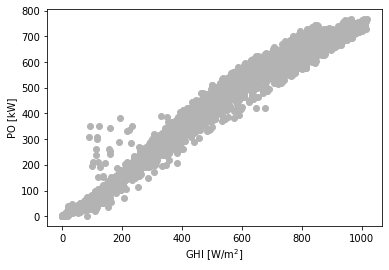

In [3]:
# load the data file
data = np.genfromtxt('ghi_power.csv', delimiter=',')

# split up the data into variables
ghi = data[:, 0]
power = data[:, 1]

# plot GHI [W/m^2] vs PO [kW]
plt.scatter(ghi, power, c='0.7')

# add labels
plt.xlabel(r'GHI [W/m$^2$]')
plt.ylabel('PO [kW]')

plt.show()

**Question:** Based on the plot, does there appear to be a relationship between GHI and PO? If so, describe the relationship.

**Answer:** Yes, a direct relationship between GHI and PO.

## 2.2) Fit the data
Use Least-Squares to fit a line to the data, i.e., find $m$ and $b$ such that

$$
y \approx m x + b ,
$$

where $x$ is the GHI [Wm$^{-2}$] and $y$ is the PO [kW].

In [4]:
# load the data file
data = np.genfromtxt('ghi_power.csv', delimiter=',')

# split up the data into variables
ghi = data[:,0]
power = data[:,1]

# re-organize the data so we can use Least-Squares:
x = np.stack([ghi, np.ones(len(ghi))], axis=1)

y = power

# use Least-Squares to fit the line:
#
# y = m x + b
#
# - m = slope
# - b = bias (aka offset)
#
m, b = np.linalg.lstsq(x, y, rcond=-1)[0]

# display the answers
print( m )
print( b )

0.8135254820687163
2.9218751655949924


**Question:** What do $m$ and $b$ represent geometrically?

**Answer:** m = slope; b = vertical axis intercept.

**Question:** What do the values of $m$ and $b$ mean? For example, what are their units.

*Hint:* $y$ is PO [kW] and $x$ GHI [Wm$^{-2}$], so $m$ and $b$ will involve one or both of those units.

**Answer:** $b$ has a unit of [kW] (initial value when GHI is 0. $m$ has a unit of [kW]/[Wm$^{-2}$].

## 2.3) Plot fitted data
Use the values for $m$ and $b$ you found in Section 2.2 to visualize the fitted line next to the measured data.

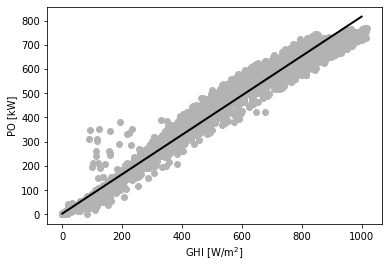

In [8]:
# the fitted values (from the previous code cell)
m = 0.8135254820687163
b = 2.9218751655949924

# calculate the fitted line over a range of inputs
x_fit = np.linspace(0, 1000, 100)
y_fit = m * x_fit + b

# load the measured data (for comparison)
data = np.genfromtxt('ghi_power.csv', delimiter=',')
ghi = data[:,0]
power = data[:,1]

# plot the measured data
plt.scatter(ghi, power, c='0.7')

# plot the fitted data
plt.plot(x_fit, y_fit, c='0.0', lw=2, ls='-')

# add labels
plt.xlabel(r'GHI [W/m$^2$]')
plt.ylabel('PO [kW]')

plt.show()

**Question:** Based on the plot, does our fitted line properly captures the relationship between GHI and PO?

**Answer:** They are positively related.

**Question:** How can we quantify the accuracy of the fitted line? For example, how do we define accuracy in this context? It's better if you can provide examples of accuracy (or error) metrics, but you can also describe the desired properties of an accuracy metric (in case you have trouble finding mathematical/formal definitions).

*Hint:* Is there a field of mathematics that defines quantitative measures of accuracy?

**Answer:** Statistics can help with estimating the error of the fitted line, or simply use the least squares method to determine how close each point is to the fitted line.

## 3)  Submission
Once you have completed all the code sections and answered the questions, you will submit the lab via TritonEd:
1. rename your notebook to include your name (e.g. ``eng10_hw4_firstname_lastname``)
2. save your notebook (File >> Save and Checkpoint)
3. log into TritonEd (tritoned.ucsd.edu)
4. submit your file for HW 4 (e.g. ``eng10_hw4_firstname_lastname.ipynb``)

